In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

import warnings 
warnings.filterwarnings('ignore')

### Importing The DataSet

In [2]:
df_ava = pd.read_csv(r"C:\Users\lokes\OneDrive\Desktop\ml project\avocado.csv")

In [3]:
df_ava.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df_ava.shape

(18249, 14)

Dataset Contains 18249 rows and 14 coulmns

In [5]:
df_ava.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
df_ava.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [7]:
df_ava.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Observations :

* As per the problem statement need to predict the cost menas data is in continuous.
* Except the 'XLarge Bags' column variations is less among them.
* There are many columns where some values are 'zero' which we can not feed to our model we have to deal with it also.
* Dataset has no null values.
* "Unnamed: 0" we can remove it.
* There could be a outliar in 'XLarge Bags' column.

## Backup Data:

In [8]:
duplicate_df = df_ava.copy()

## Exploratry Data Analysis(EDA)

In [9]:
#Checking the distribution of target variable
df_ava['AveragePrice'].iplot()

In [10]:
df_ava['Date']=pd.to_datetime(df_ava['Date']) # converting the Date column into datetime format

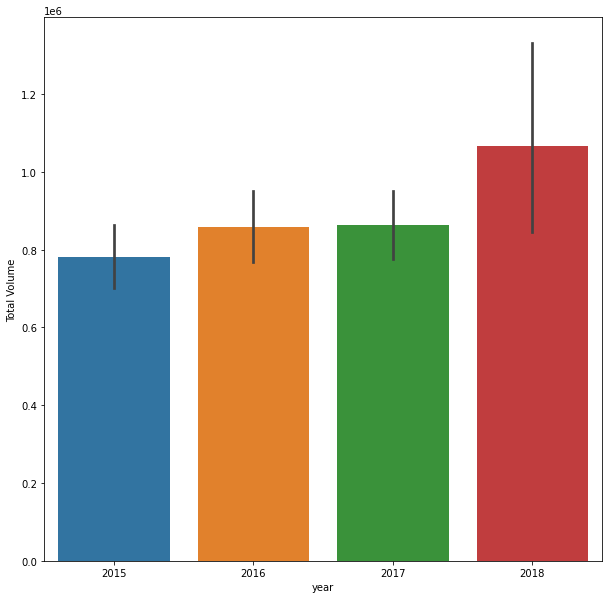

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(x='year',y='Total Volume',data=df_ava)

As per above bar graph we can see 'total volume or Total number of avocados sold' year wise,2018 shows highest ratio otherhand
2015 to 2017 ratio almost similer.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 <a list of 54 Text major ticklabel objects>)

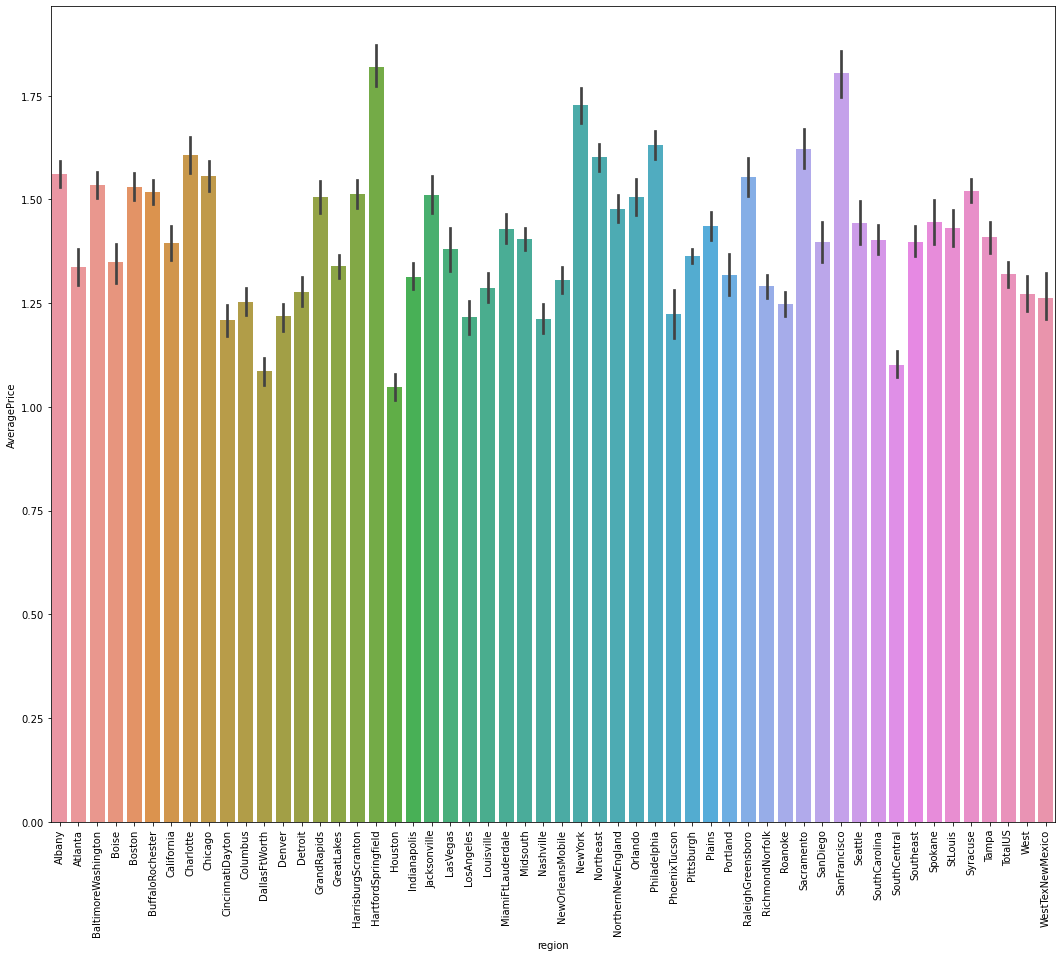

In [12]:
#Checking the relation with target variable and region
plt.figure(figsize=(18,15))
sns.barplot(x='region',y='AveragePrice',data=df_ava)
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

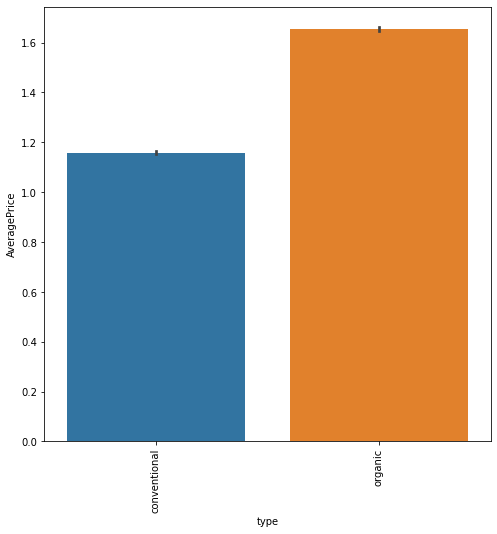

In [13]:
#Checking the relation with target variable and type
plt.figure(figsize=(8,8))
sns.barplot(x='type',y='AveragePrice',data=df_ava)
plt.xticks(rotation=90)

<Figure size 1080x864 with 0 Axes>

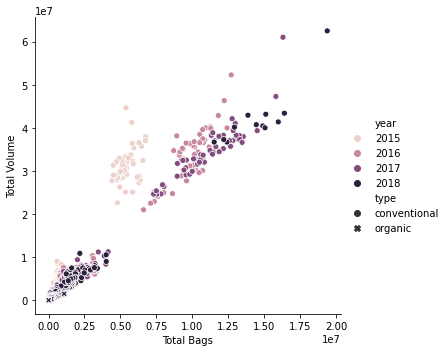

In [14]:
#Checking the relation with Total Bags and Total Volume
plt.figure(figsize=(15,12))
sns.relplot(x='Total Bags',y='Total Volume',data=df_ava,hue='year',style='type')

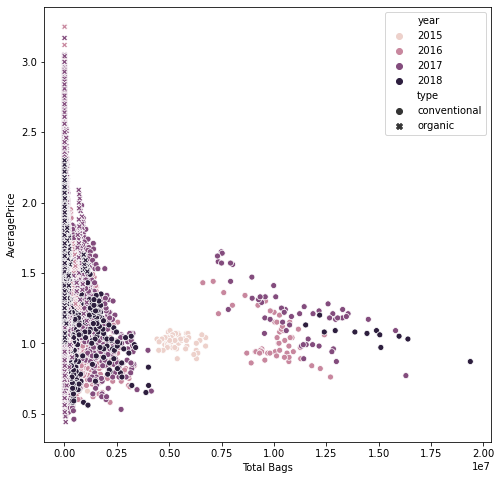

In [15]:
#Checking the relation with Total Bags and AveragePrice
plt.figure(figsize=(8,8))
sns.scatterplot(x='Total Bags',y='AveragePrice',data=df_ava,hue='year',style='type')

### Outliars Detection and Removel :

In [16]:
# Filltering the numeric columns
numeric_data = df_ava.select_dtypes(include=['int64','float64'])
numeric_data.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

replacing '0' values with mean

In [17]:
df_ava['Total Volume'] = df_ava['Total Volume'].replace(0,df_ava['Total Volume'].mean())
df_ava['4046'] = df_ava['4046'].replace(0,df_ava['4046'].mean())
df_ava['4225'] = df_ava['4225'].replace(0,df_ava['4225'].mean())
df_ava['4770'] = df_ava['4770'].replace(0,df_ava['4770'].mean())
df_ava['Total Bags'] = df_ava['Total Bags'].replace(0,df_ava['Total Bags'].mean())
df_ava['Small Bags'] = df_ava['Small Bags'].replace(0,df_ava['Small Bags'].mean())
df_ava['Large Bags'] = df_ava['Large Bags'].replace(0,df_ava['Large Bags'].mean())
df_ava['XLarge Bags'] = df_ava['XLarge Bags'].replace(0,df_ava['XLarge Bags'].mean())

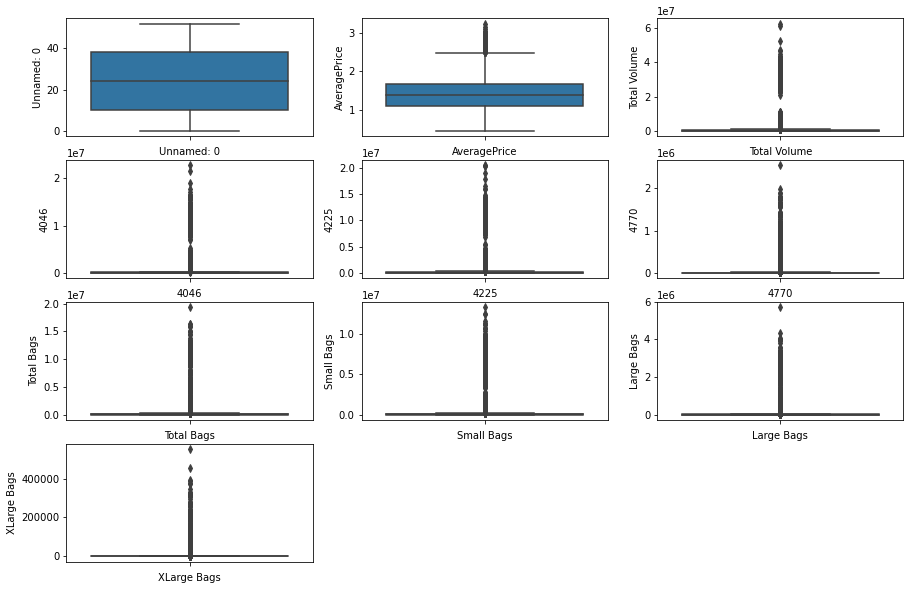

In [18]:
# Checking the distribution of data
plt.figure(figsize=(15,10))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.boxplot(numeric_data[column],orient='v')
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

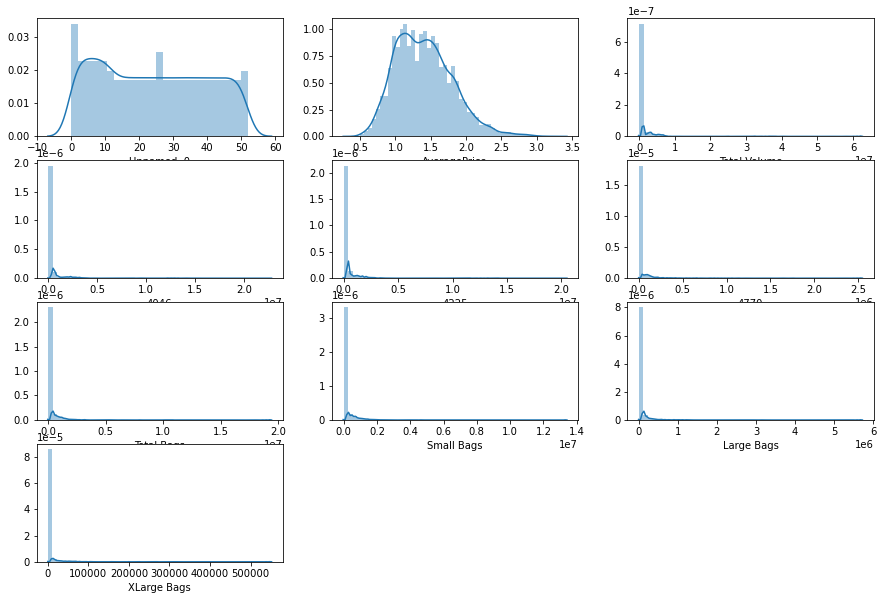

In [19]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in numeric_data:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_data[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

In [4]:
from sklearn.preprocessing import PowerTransformer

In [5]:
# z_score = zscore(df_ava[['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']])
# abs_values = np.abs(z_score)
# filttering_values = (abs_values<2).all(axis=1)
# df_ava = df_ava[filttering_values]

In [6]:
power = PowerTransformer(method='yeo-johnson')

In [7]:
df_ava['Total Volume'] = power.fit_transform(df_ava['Total Volume'].values.reshape(-1,1))
df_ava['4046'] = power.fit_transform(df_ava['4046'].values.reshape(-1,1))
df_ava['4225'] = power.fit_transform(df_ava['4225'].values.reshape(-1,1))
df_ava['4770'] = power.fit_transform(df_ava['4770'].values.reshape(-1,1))
df_ava['Total Bags'] = power.fit_transform(df_ava['Total Bags'].values.reshape(-1,1))
df_ava['Large Bags'] = power.fit_transform(df_ava['Large Bags'].values.reshape(-1,1))
df_ava['XLarge Bags'] = power.fit_transform(df_ava['XLarge Bags'].values.reshape(-1,1))
df_ava['Small Bags'] = power.fit_transform(df_ava['Small Bags'].values.reshape(-1,1))

In [8]:
df_ava.shape

(18249, 14)

In [25]:
# Filltering the numeric columns
numeric_new = df_ava.select_dtypes(include=['int64','float64'])
numeric_new.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')

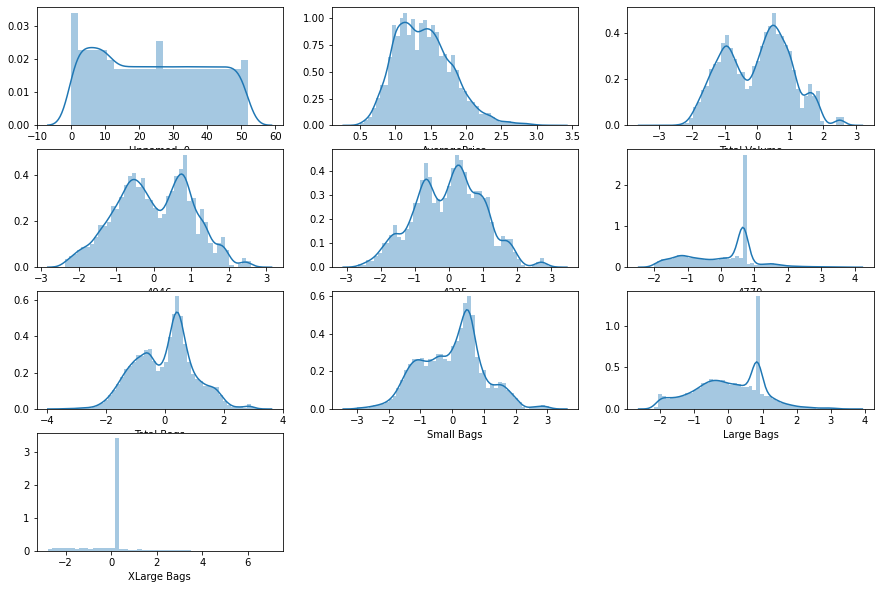

In [26]:
plt.figure(figsize=(15,10))
plotnumber=1
for column in numeric_new:
    if plotnumber <=10:
        plt.subplot(4,3,plotnumber)
        sns.distplot(numeric_new[column])
        plt.xlabel(column,fontsize=10)
        plotnumber+=1
plt.show()

Now our data is seems normal distributed.

### Checking correlation using heat map

In [27]:
corrrelation = numeric_new.corr()

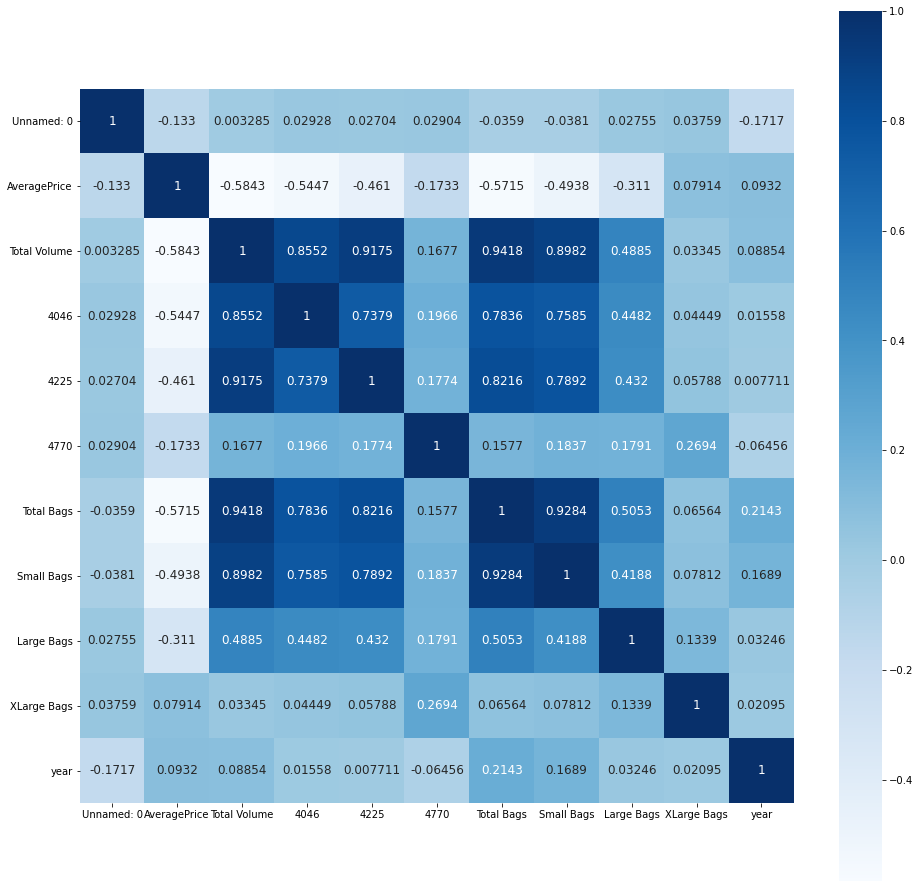

In [28]:
plt.figure(figsize=(16,16))
sns.heatmap(corrrelation,cbar=True, square=True,fmt='.4g',annot=True,annot_kws={'size':12},cmap='Blues')

As per above we can see there are few columns like 'total bags','small bags','4046', '4225' showing correlation.
However we will check futher if they are rellay correlated with each other.

## Feature Engineering :

##### Endoding Categorical Variables :

In [9]:
df_ava = df_ava.drop(columns=['Unnamed: 0','Date','year'],axis=1)

removing the above columns as they are not much contributing.

In [10]:
df_ava=pd.get_dummies(df_ava,drop_first=True)
df_ava.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_organic,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
X = df_ava.drop(columns=['AveragePrice'],axis=1)
y = df_ava['AveragePrice']

In [13]:
print("Shape of X", X.shape)
print("Shape of Y", y.shape)

Shape of X (18249, 62)
Shape of Y (18249,)


In [14]:
# Scaling the features using standardscaler
scaler = StandardScaler()

In [15]:
x_scale =  scaler.fit_transform(X)

#### Using PCA for dimentions reduction :

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=20) # taking only 20 dimention

In [18]:
x_pca=pca.fit_transform(x_scale)
x_pca

array([[-6.40869801e-01,  4.77322847e-01,  3.30641584e-02, ...,
        -1.39496193e-09,  3.34849680e-08, -5.83399467e-08],
       [-6.88440045e-01,  4.72629044e-01,  3.85848575e-02, ...,
        -1.26677497e-09,  3.47955019e-08, -5.99659360e-08],
       [-4.08907626e-01,  5.64030269e-01,  4.45736648e-02, ...,
        -3.58088705e-09,  2.75474339e-08, -5.91471236e-08],
       ...,
       [-1.61910089e+00, -1.98373985e-01,  4.04420292e-02, ...,
        -1.26349350e-09, -8.04939878e-09,  5.55427959e-09],
       [-1.49390923e+00, -2.07325689e-01,  2.00028671e-02, ...,
        -1.50590142e-09, -9.61538204e-09,  7.03547717e-09],
       [-1.54819784e+00, -2.22685372e-01, -3.30575028e-02, ...,
        -2.46824498e-09, -8.98858991e-09,  3.61447438e-09]])

In [20]:
x_pca.shape

(18249, 20)

In [21]:
X_train, X_test, y_train, y_test  = train_test_split(x_pca, y, test_size=0.30,random_state=42)

## Model Building....!

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [23]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
adb=AdaBoostRegressor()
svm=SVR()
print("Model is created")

Model is created


In [49]:
lr.fit(X_train, y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
rf.fit(X_train,y_train)
adb.fit(X_train,y_train)
svm.fit(X_train,y_train)
print("Model is trained")

Model is trained


In [25]:
print("lr_score",lr.score(X_train,y_train))
print("knn_score",knn.score(X_train,y_train))
print("dt_score",dt.score(X_train,y_train))
print("rf_score",rf.score(X_train,y_train))
print("adb_score",adb.score(X_train,y_train))
print("svm_score",svm.score(X_train,y_train))

lr_score 0.47265252494308596
knn_score 0.8677545382869531
dt_score 1.0
rf_score 0.975520095910282
adb_score 0.4332732040398809
svm_score 0.6803262238054365


### Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
lr_pred_y = lr.predict(X_test)
knn_pred_y = knn.predict(X_test)
dt_pred_y = dt.predict(X_test)
rf_pred_y = rf.predict(X_test)
adb_pred_y = adb.predict(X_test)
svm_pred_y = svm.predict(X_test)

In [47]:
print("lr_score",mean_squared_error(y_test,lr_pred_y))
print("knn_score",mean_squared_error(y_test,knn_pred_y))
print("dt_score",mean_squared_error(y_test,dt_pred_y))
print("rf_score",mean_squared_error(y_test,rf_pred_y))
print("adb_score",mean_squared_error(y_test,adb_pred_y))
print("svm_score",mean_squared_error(y_test,svm_pred_y))

lr_score 0.08980277321691993
knn_score 0.03609197223744292
dt_score 0.05724438356164384
rf_score 0.030081896562557074
adb_score 0.09600366385586483
svm_score 0.053044263987657624


## CrossValidation :

In [48]:
from sklearn.model_selection import KFold,cross_val_score

In [49]:
k_f = KFold(n_splits=3,shuffle=True)
k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [50]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5))
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5))
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5))
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5))
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5))
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5))

Cross validation score for lr model => [-0.14188883  0.2096142   0.53706441  0.2682869   0.01559662]
Cross validation score for knn model => [-0.86387592  0.30390087  0.49491909  0.05071985 -0.01203757]
Cross validation score for dt model => [-1.14507139  0.11235456  0.18057786 -0.19352753 -0.3056636 ]
Cross validation score for rf model => [-0.28240218  0.39378075  0.61010957  0.25693004  0.06769972]
Cross validation score for adb model => [-1.10824205  0.07792139  0.25902722 -0.21723888  0.02534954]
Cross validation score for svm model => [-0.53082502  0.36577138  0.6216522   0.33249147  0.13421171]


In [51]:
print("Cross validation score for lr model","=>",cross_val_score(lr,x_scale,y,cv=5).mean())
print("Cross validation score for knn model","=>",cross_val_score(knn,x_scale,y,cv=5).mean())
print("Cross validation score for dt model","=>",cross_val_score(dt,x_scale,y,cv=5).mean())
print("Cross validation score for rf model","=>",cross_val_score(rf,x_scale,y,cv=5).mean())
print("Cross validation score for adb model","=>",cross_val_score(adb,x_scale,y,cv=5).mean())
print("Cross validation score for svm model","=>",cross_val_score(svm,x_scale,y,cv=5).mean())

Cross validation score for lr model => 0.1777346610327462
Cross validation score for knn model => -0.005274736646462852
Cross validation score for dt model => -0.25794013991310905
Cross validation score for rf model => 0.205785581914015
Cross validation score for adb model => -0.09424828771908252
Cross validation score for svm model => 0.1846603491592867


In as per above usage matrics we found our random forest model only came with positive output.and other model not giving the desirable scores.lets see the hyperparameter tuing and check if we could increase our models accuracy.

### HyperParameter Tuning :

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
rf.get_params().keys()  # to check the parameters

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [28]:
param_grid = {'n_estimators':[10, 20],
             'criterion':['mse','mae'],'max_depth':[2, 3,4,5],
             'min_samples_split':[2,3,4]}
param_grid

{'n_estimators': [10, 20],
 'criterion': ['mse', 'mae'],
 'max_depth': [2, 3, 4, 5],
 'min_samples_split': [2, 3, 4]}

In [29]:
gridsearch = GridSearchCV(rf,param_grid = param_grid,cv=3,verbose = 2 ,n_jobs =4)

In [30]:
gridsearch.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20]},
             verbose=2)

In [31]:
gridsearch.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 20}

In [32]:
random_forest=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=True,positive=True)

In [33]:
random_forest.fit(X_train, y_train)

LinearRegression(n_jobs=1, normalize=True, positive=True)

In [35]:
random_forest.score(X_train, y_train)

0.042745152732563185

In [37]:
y_pred = random_forest.predict(X_test)

In [40]:
mean_squared_error(y_test,y_pred)

0.155108285205099

Without Hyperparameter score coming is better hence we are saving model without tuning.

### Model saving

In [44]:
import pickle

In [45]:
Avacado_model = 'Avacado.pickle'

In [48]:
pickle.dump(rf,open(Avacado_model,'wb'))

## Thank You........!